# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import signal, stats
import sklearn 
import seaborn as sns

# 1. States

In [2]:
customer_state = ['Ordering the coffee','Waiting for your coffee','Leaving']
states = {'O':customer_state[0],'M':customer_state[1],'L':customer_state[2]}

# 2. One Customer One Drink Example

In [3]:
mu, sigma = 5, 1


def one_drink_one_cust():
    start = states['O']
    print(start+'\n')
    ordering_time = 0.5
    first_state = states['M']
    print(first_state+'\n')
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu, scale=sigma)
        k = np.random.choice([0, 1], p = [1-p, p])
        waiting_time = waiting_time+0.5
        if k == 0:
            print('Coffee is brewing... \n')
    print('Your coffee is ready! \n')
    print(states['L']+'\n')
    print('Waiting time is = %.2f' % (waiting_time))
    return waiting_time

In [4]:
one_drink_one_cust()

Ordering the coffee

Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 5.00


5.0

# 3. One Customer Multiple Drinks Example

In [5]:
kind_of_coffee = np.array(pd.read_csv('starbucks-menu-nutrition-drinks.csv')['Unnamed: 0'])
p_start = []

# Generate fake distribution for drinks
for i in range(len(kind_of_coffee)):
    p_start.append(np.random.choice(np.arange(50,100)))

p_start = np.array(np.array(list(np.array(p_start)/sum(p_start))))

In [6]:
len(kind_of_coffee)

177

In [7]:
len(p_start)

177

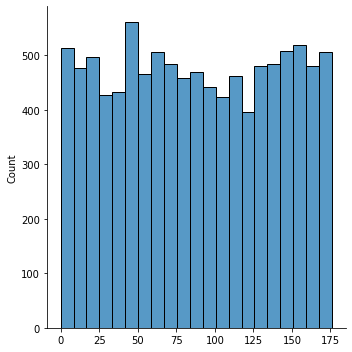

In [8]:
coffe_picked = []
for i in range(10000):
    coffe_picked.append(np.random.choice(range(0,len(kind_of_coffee)),p=p_start))
sns.displot(coffe_picked);

In [9]:
coffee_data = pd.DataFrame(kind_of_coffee,columns=['State 1'])
mu_list = []
var_list = []
for i in range(len(coffee_data)):
    mu_list.append(np.random.choice(np.linspace(3,6,1000)))
    var_list.append(np.random.choice(np.linspace(0.1,1.5,1000)))
coffee_data[r'$\mu$']=mu_list
coffee_data[r'$\sigma$']=var_list
coffee_data[r'$p$'] = p_start
coffee_data.head()

,State 1,$\mu$,$\sigma$,$p$
0,Cool Lime Starbucks Refreshers™ Beverage,4.084084,0.263964,0.004575
1,Ombré Pink Drink,5.708709,0.681582,0.007167
2,Pink Drink,5.249249,0.336837,0.006176
3,Strawberry Acai Starbucks Refreshers™ Beverage,5.135135,0.688589,0.006786
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,3.840841,0.419520,0.006481


In [10]:
def random_drink_one_cust():
    start = states['O']
    print(start+'\n')
    ordering_time = 0.5
    first_state = states['M']
    chosen_i = np.random.choice(range(0, len(kind_of_coffee)), p=p_start)
    print('Ordering coffee %s' % (kind_of_coffee[chosen_i]))
    print(first_state+'\n')

    mu_i, var_i = coffee_data[r'$\mu$'].loc[chosen_i], coffee_data[r'$\sigma$'].loc[chosen_i]
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu_i, scale=var_i)
        k = np.random.choice([0, 1], p=[1-p, p])
        waiting_time = waiting_time+0.5
        if k == 0:
            print('Coffee is brewing... \n')
    print('Your coffee is ready! \n')
    print(states['L']+'\n')
    print('Waiting time is = %.2f' % (waiting_time))
    return waiting_time

In [11]:
random_drink_one_cust()

Ordering the coffee

Ordering coffee Starbucks® Low Calorie Iced Coffee + Milk
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 3.50


3.5

#### How much time does it usually take to grab a whatever coffee at Starbucks?

In [12]:
def random_drink_one_cust_2():
    start = states['O']
    # print(start+'\n')
    ordering_time = 0.5
    first_state = states['M']
    chosen_i = np.random.choice(range(0, len(kind_of_coffee)), p=p_start)
    # print('Ordering coffee %s' % (kind_of_coffee[chosen_i]))
    # print(first_state+'\n')
    mu_i, var_i = coffee_data[r'$\mu$'].loc[chosen_i], coffee_data[r'$\sigma$'].loc[chosen_i]
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu_i, scale=var_i)
        k = np.random.choice([0, 1], p=[1-p, p])
        waiting_time = waiting_time+0.5
        # if k == 0:
        #     print('Coffee is brewing... \n')
    # print('Your coffee is ready! \n')
    # print(states['L']+'\n')
    # print('Waiting time is = %.2f' % (waiting_time))
    return waiting_time

Text(0, 0.5, 'Probability Density Function (PDF)')

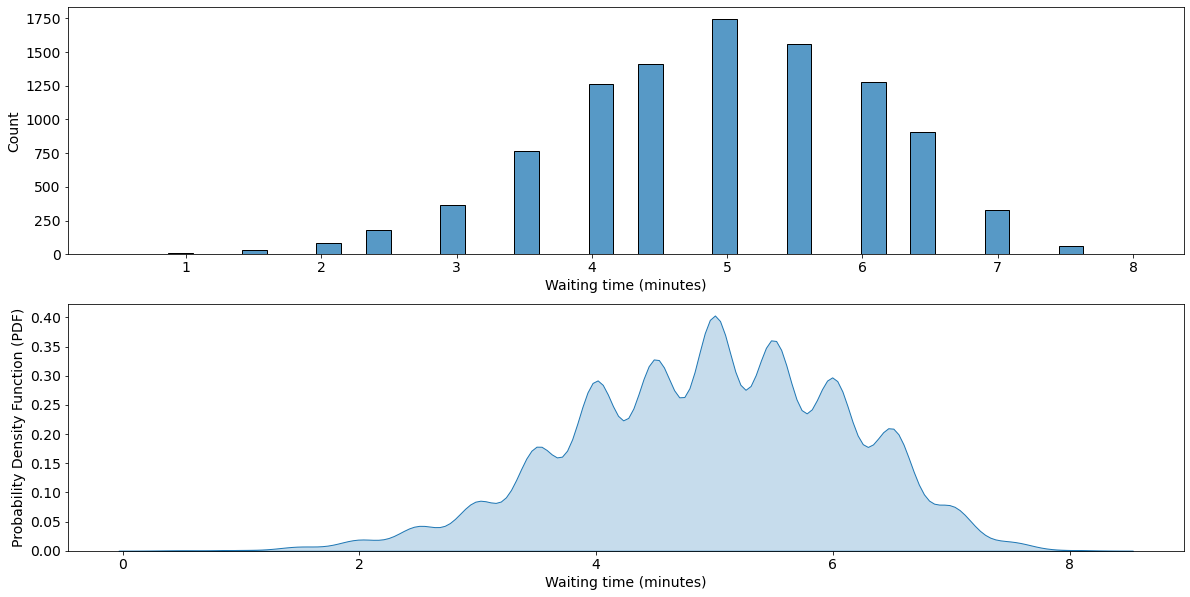

In [13]:
waiting_time_list = []
for i in range(10000):
    waiting_time_list.append(random_drink_one_cust_2())
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.histplot(waiting_time_list, fill=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Waiting time (minutes)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.subplot(2,1,2)
sns.kdeplot(waiting_time_list,fill=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Waiting time (minutes)',fontsize=14)
plt.ylabel('Probability Density Function (PDF)',fontsize=14)

# 4. Multiple Customers Multiple Drinks Example

In [14]:
def random_drink_multiple_cust(cust=2, num_baristas=5):
    time_of_process = []
    baristas = np.zeros(num_baristas)
    q = 0
    ordering_time = 0
    for c in range(cust):
        start = states['O']
        print('Customer number %i is ordering' % (c))
        ordering_time += 0.5
        if sum(baristas) != num_baristas:
            print('There is at least one free baristas! :)')
            waiting_time = random_drink_one_cust()
            time_of_process.append(waiting_time+ordering_time)
            baristas[q] = 1
            q = q + 1 
        if len(time_of_process) == cust:
            break
        if sum(baristas) == num_baristas:
            print('All the baristas are busy :(')
            print('You have to wait an additional %i minutes until they can start making your coffee' %(min(time_of_process)))
            waiting_time = min(time_of_process)+random_drink_one_cust()+ordering_time
            baristas[num_baristas-1] = 0
            time_of_process.append(waiting_time)
            q = q-1
        if len(time_of_process) == cust:
            break
    print('The waiting time for each customer is:')
    print(time_of_process)
    return time_of_process

In [15]:
random_drink_multiple_cust(4,2)

Customer number 0 is ordering
There is at least one free baristas! :)
Ordering the coffee

Ordering coffee Tazo® Bottled Black with Lemon
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 3.50
Customer number 1 is ordering
There is at least one free baristas! :)
Ordering the coffee

Ordering coffee Tazo® Bottled Black with Lemon
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 3.50
All the baristas are busy :(
You have to wait an additional 4 minutes until they can start making your coffee
Ordering the coffee

Ordering coffee White Chocolate Mocha
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 



[4.0, 4.5, 9.5, 6.0]